In [4]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

### **LIF or Lapicque Model**

The Leaky Integrate-and-Fire (LIF) model is actually a descendant of Lapicque's original work from 1907, and understanding their connection helps illuminate how our modeling of neurons has evolved.

#### Lapicque's Model (1907):
This was one of the first mathematical models to describe how neurons generate action potentials. Lapicque conceptualized the neuron membrane as an electrical circuit with a capacitor in parallel with a resistor. The capacitor represents the membrane's ability to store charge, while the resistor represents ion channels that allow current to flow across the membrane. When sufficient input current arrives, the membrane potential increases until it reaches a threshold, at which point a spike occurs.

#### The Leaky Integrate-and-Fire (LIF) Model:
The LIF model is essentially a refined and more precisely formulated version of Lapicque's original insights. It adds several important features and clarifications:
- ***Explicit Mathematical Framework:*** The LIF model is typically described by the differential equation: τm(dV/dt) = -(V - Vrest) + RI. Where:
  - τm is the membrane time constant
  - V is the membrane potential
  - Vrest is the resting potential
  - R is the membrane resistance
  - I is the input current
- ***Defined Reset Mechanism:*** After a spike occurs, the LIF model includes a clear reset mechanism where the voltage returns to a specific reset potential, followed by a refractory period during which the neuron cannot spike again.

Key Differences:
1. Mathematical Formalization: While Lapicque's model provided the conceptual framework, the LIF model offers a more rigorous mathematical treatment. The differential equations and parameters are more precisely defined.
2. Reset Dynamics: Lapicque's original model was less specific about what happens after a spike. The LIF model explicitly defines the reset voltage and refractory period.
3. Computational Implementation: The LIF model is designed to be more readily implemented in computer simulations, with clear discrete time steps and numerical integration methods.
4. Parameter Definition: The LIF model has more clearly defined parameters that can be measured and adjusted, making it more useful for both theoretical studies and practical applications.

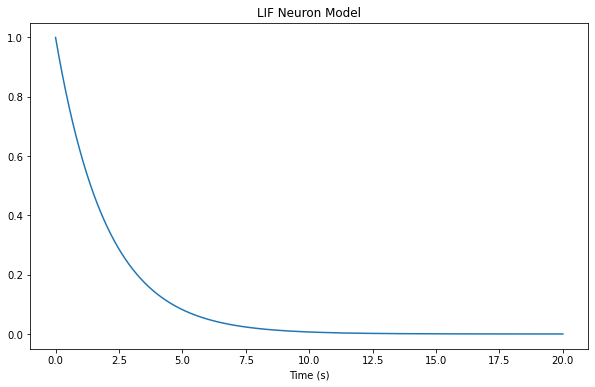

In [5]:
# Use Euler method for solving a sample LIF neuron model
# LIF model differential equation: dV/dt = -(V - V_init)/tau


t = 0. # Starting time
dt = 0.001 # Time step
tEnd = 20. # End time

# LIF parameters
V_init = 0 # neuron starting voltage (at t = 0)
Vt = 1 # Neuron voltage at time step t
tau = 2. # Time constant

lstV = [] # List to store voltage values
lstTime = [] # List to store time values

for i in range(int(tEnd/dt)):
    # Use Euler method
    Vt = Vt + dt * (-(Vt - V_init)/tau)
    
    t += dt
    
    lstV.append(Vt)
    lstTime.append(t)

# plot the results
fig = plt.figure(figsize=(10, 6))
plt.plot(lstTime, lstV)
plt.title('LIF Neuron Model')
plt.xlabel('Time (s)')
plt.show()

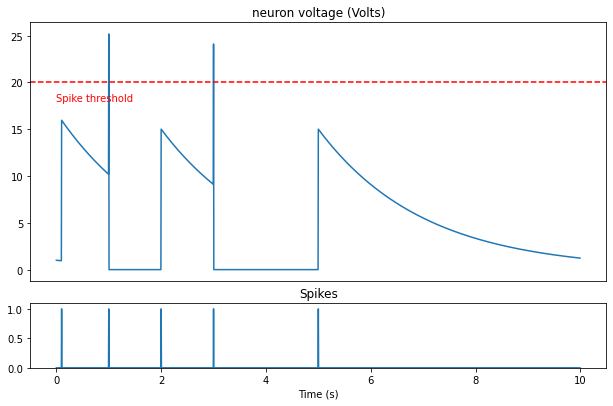

In [6]:
# Use Euler method for exciting a neuron multiple times

t = Decimal("0") # Starting time
dt = Decimal("0.005") # Time step
tEnd = Decimal("10") # End time

# LIF parameters
V_th = 20 # Volts
V_init = 0 # neuron starting voltage (at t = 0)
Vt = 1 # Neuron voltage at time step t
tau = 2. # Time constant
V_excitation = 15 # Voltage added to the neuron at each time step
tExcitation = [Decimal(".1"), Decimal("1"), Decimal("2"), Decimal("3"), Decimal("5")]

lstV = [] # List to store voltage values
lstTime = [] # List to store time values
lstSpike = [] # List to store spike values at each time step

for i in range(int(tEnd/dt)):
    # Use Euler method
    
    # If voltage is greater than threshold, reset voltage
    if V_th <= Vt:
        Vt = V_init 
    
    Vt = Vt + float(dt) * (-(Vt - V_init)/tau)
    
    
    # If excited, add extra voltage
    if t in tExcitation:
        lstSpike.append(1)
        Vt += V_excitation
    else:
        lstSpike.append(0)
    
    lstV.append(Vt)
    lstTime.append(t)
    t += dt
    
# Create figure and subplots
fig = plt.figure(figsize=(10, 6))

# Top subplot (80% of the height)
ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])  # [left, bottom, width, height]
ax1.plot(lstTime, lstV)
ax1.set_title('neuron voltage (Volts)')
ax1.xaxis.set_visible(False)  # Hide x-axis numbers
ax1.axhline(y=V_th, color='r', linestyle='--')
ax1.text(lstTime[0], V_th * .9, 'Spike threshold', color='r')

# Bottom subplot (20% of the height)
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.15])  # [left, bottom, width, height]
ax2.plot(lstTime, lstSpike)
ax2.set_ylim(0, 1.1)
ax2.set_title('Spikes')
ax2.set_xlabel('Time (s)')

plt.show()

#### snnTorch - LIF with step input

Now, instead of reinventing the wheel, its best to use other packages that have threaded this path once. Here we will use snnTorch library ([see here](https://snntorch.readthedocs.io)). The most basic form of LIF model is known by *Lapicque Model* in this package.

You can customize this model for various behaviors which we will go through them in detail in this article.

At each time step ***t*** a *snnTorch* LIF neuron takes an input current and the previous time step's (At ***t-1***) potential (As you know, each human neuron takes an input current and outputs a voltage) and returns a spike (0 for no spike and 1 for a spike) and the neuron's current potential. 

Also on a side-note, you can change the speed of gradual increase of the neuron potential (Plotted in red) by altering parameters *R* and *C*.

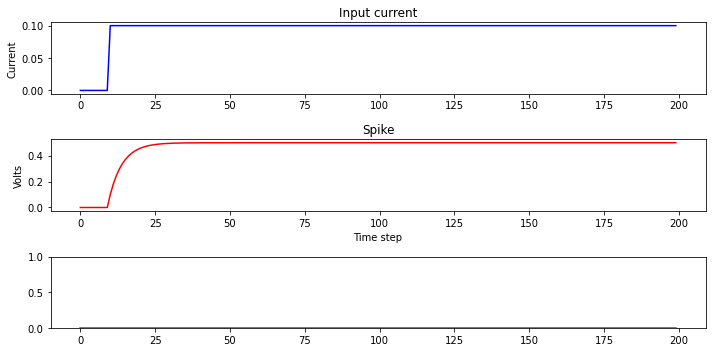

In [7]:

import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import matplotlib.pyplot as plt


timeStep = 1e-3
numSteps = 200
inputCurrent = torch.zeros(numSteps,1)

# Add an input current after 10th time step
inputCurrent[10:] = torch.ones(190,1) * .1

R = 5
C = 1e-3
lifModel = snn.Lapicque(R=R, C=C, time_step=timeStep)


lstPotentials = []
lstSpikes = []
__potential = torch.ones(1) * 0
for step in range(numSteps):
    __spike, __potential = lifModel(inputCurrent[step], __potential)
    lstPotentials.append(__potential)
    lstSpikes.append(__spike)

# Convert to pyTorch tensor
potentials = torch.stack(lstPotentials)
spikes = torch.stack(lstSpikes)

# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create figure with specific size (width=8 inches, height=10 inches)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5))

# First subplot
ax1.plot(torch.arange(numSteps), inputCurrent, 'b-', label='Sine wave'); ax1.set_title('Input current'); ax1.set_ylabel('Current')

# Second subplot
ax2.plot(torch.arange(numSteps), potentials, 'r-', label='Cosine wave'); ax2.set_title('Neuron potential'); ax2.set_ylabel('Volts')

# Third subplot
ax3.plot(torch.arange(numSteps), spikes, 'r-', label='Cosine wave'); ax2.set_title('Spike'); ax2.set_xlabel('Time step'); ax3.set_ylim(0,1)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

#### snnTorch - LIF with pulse input

In the example above, we have induced a step input current at *timestep = 10*. As you can see, the neuron potential gradually increases to ~0.5 and stays there. You might wonder that we are not seeing a leaky behavior here; however, you must be note that the input current is continuous and from t = 10 until the end, neuron is inputted a steady current which cancels out the inherent potential leak of the neuron. To see the leaky behavior of the neuron, instead of a step input for current, we input a pulse current to the neuron. As you can see, there still is no spike generated, but, when the neuron's input current is taken away, its potential decays to zero. Also, in the second pulse, the current is taken away so fast that neuron potential doesn't get saturated.

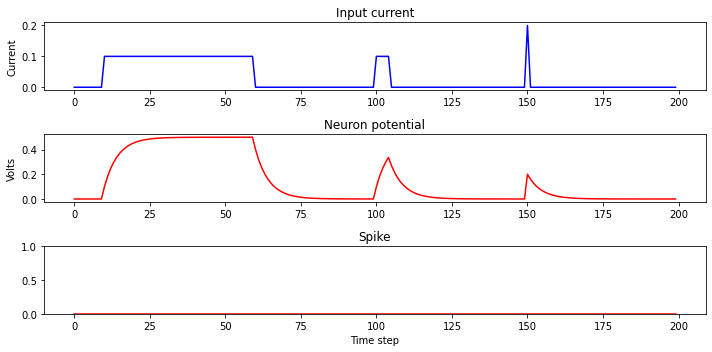

In [8]:
timeStep = 1e-3
numSteps = 200
inputCurrent = torch.zeros(numSteps,1)

# Add an input current after 10th time step
inputCurrent[10:60] = torch.ones(50,1) * .1
inputCurrent[100:105] = torch.ones(5,1) * .1
inputCurrent[150] = torch.ones(1,1) * .2

R = 5
C = 1e-3
lifModel = snn.Lapicque(R=R, C=C, time_step=timeStep)


lstPotentials = []
lstSpikes = []
__potential = torch.ones(1) * 0
for step in range(numSteps):
    __spike, __potential = lifModel(inputCurrent[step], __potential)
    lstPotentials.append(__potential)
    lstSpikes.append(__spike)

# Convert to pyTorch tensor
potentials = torch.stack(lstPotentials)
spikes = torch.stack(lstSpikes)

# Create figure with specific size (width=8 inches, height=10 inches)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5))

# First subplot
ax1.plot(torch.arange(numSteps), inputCurrent, 'b-', label='Sine wave'); ax1.set_title('Input current'); ax1.set_ylabel('Current')

# Second subplot
ax2.plot(torch.arange(numSteps), potentials, 'r-', label='Cosine wave'); ax2.set_title('Neuron potential'); ax2.set_ylabel('Volts')

# Third subplot
ax3.plot(torch.arange(numSteps), spikes, 'r-', label='Cosine wave'); ax3.set_title('Spike'); ax3.set_xlabel('Time step'); ax3.set_ylim(0,1)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


#### snnTorch - LIF Neuron Firing

In the example below, we have altered the code so that when potential reaches 0.4 *Volts*, it firs and the resets to 0 potential.


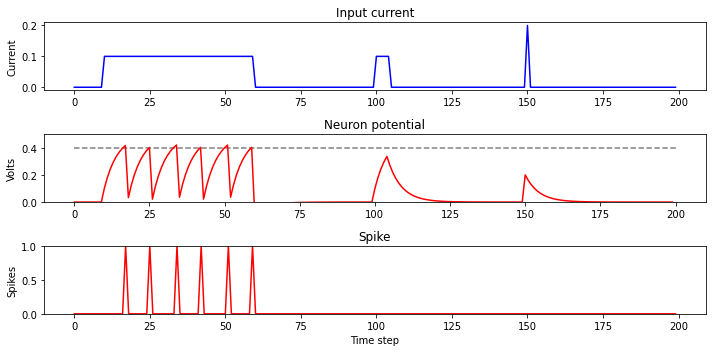

In [25]:
timeStep = 1e-3
numSteps = 200
inputCurrent = torch.zeros(numSteps,1)

# Add an input current after 10th time step
inputCurrent[10:60] = torch.ones(50,1) * .1
inputCurrent[100:105] = torch.ones(5,1) * .1
inputCurrent[150] = torch.ones(1,1) * .2

R = 5
C = 1e-3
threshold = .4
lifModel = snn.Lapicque(R=R, C=C, time_step=timeStep,threshold = threshold)


lstPotentials = []
lstSpikes = []
__potential = torch.ones(1) * 0
for step in range(numSteps):
    __spike, __potential = lifModel(inputCurrent[step], __potential)
    lstSpikes.append(__spike) 
    lstPotentials.append(__potential)

# Convert to pyTorch tensor
potentials = torch.stack(lstPotentials)
spikes = torch.stack(lstSpikes)

# Create figure with specific size (width=8 inches, height=10 inches)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5))

# First subplot
ax1.plot(torch.arange(numSteps), inputCurrent, 'b-', label='Sine wave'); ax1.set_title('Input current'); ax1.set_ylabel('Current')

# Second subplot
ax2.plot(torch.arange(numSteps), potentials, 'r-', label='Cosine wave'); ax2.set_title('Neuron potential'); ax2.set_ylabel('Volts'); ax2.set_ylim(0,0.5); ax2.hlines(.4,0,200, ls = "dashed", color = "grey")

# Third subplot
ax3.plot(torch.arange(numSteps), spikes, 'r-', label='Cosine wave'); ax3.set_title('Spike'); ax3.set_xlabel('Time step'); ax3.set_ylabel('Spikes'); ax3.set_ylim(0,1)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


### **Synaptic Conductance-based LIF Neuron Model**

The classic LIF model, models the increase in the neuron's potential with a sudden (discontinuous) shift in potential which is not totally accurate (*See the third impulse of the previous example's neuron at t = 150s*). The *Synaptic Conductance-based LIF Neuron* alleviates this problem by explicitly modeling the effect of synaptic inputs through conductance changes rather than direct current injections.

In biological neurons, the effect of a synaptic input depends on:

1. The type of ion channels opened: Different synapses (excitatory or inhibitory) open different ion channels, leading to different reversal potentials V_i.

2. The current membrane potential: The driving force (V(t)−V_i) determines how much current flows through the open channels.

By modeling synaptic inputs as conductance changes, the conductance-based LIF model captures these biological details more accurately than current-based models.
To model this king of neurons, we use snnTorch yet again. The synaptic neurons need two parameters to be defined properly:

1. α: The decay rate of the synaptic current
2. β: The decay rate of the membrane potential (as with Lapicque)

There is a very interesting pont regarding this model which I have copy pasted from snnTorch's documentation (Huge shout out to them!):

A natural question that arises is - when do I want to use a 1st order LIF neuron and when should I use this 2nd order LIF neuron? While this has not really been settled, my own experiments have given me some intuition that might be useful.

##### When 2nd-order neurons are better

1. If the temporal relations of your input data occur across long time-scales,
2. if the input spiking pattern is sparse

By having two recurrent equations with two decay terms (alpha and beta), this neuron model is able to ‘sustain’ input spikes over a longer duration. This can be beneficial to retaining long-term relationships.

An alternative use case might also be: *When temporal codes matter*

If you care for the precise timing of a spike, it seems easier to control that for a 2nd-order neuron. In the Leaky model, a spike would be triggered in direct synchrony with the input. For 2nd-order models, the membrane potential is ‘smoothed out’ (i.e., the synaptic current model low-pass filters the membrane potential), which means one can use a finite rise time for U(t). This is clear in the previous simulation, where the output spikes experience a delay with respect to the input spikes.

#### When 1st-order neurons are better
Any case that doesn’t fall into the above, and sometimes, the above cases.

By having one less equation in 1st-order neuron models (such as Leaky), the backpropagation process is made a little simpler. Though having said that, the Synaptic model is functionally equivalent to the Leaky model for alpha = 0. In my own hyperparameter sweeps on simple datasets, the optimal results seem to push  alpha as close to 0 as possible. As data increases in complexity, alpha may grow larger.

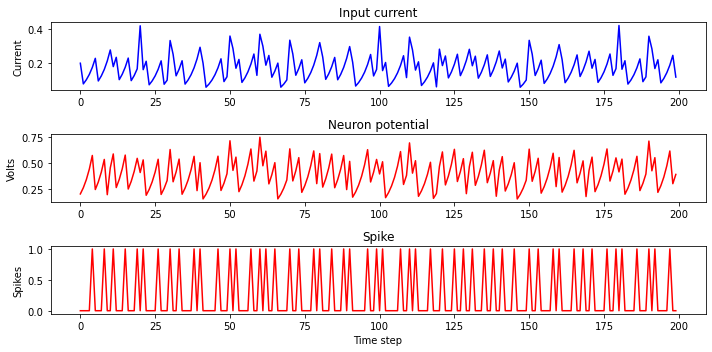

In [56]:
# Temporal dynamics
alpha = 0.4
beta = 0.9
numSteps = 200

# Initialize Synaptic Conductance-based LIF neuron
lif1 = snn.Synaptic(alpha=alpha, beta=beta, threshold=.5)

# Initialize the input spikes
spikeIn = torch.cat((torch.ones(1)*.2, torch.zeros(9)), 0).repeat(20)

# Initial conditions and necessary lists to save the records
synCurrent, potential = lif1.init_synaptic()
spkOut = torch.zeros(1)
lst_synCurrent, lst_pot, lst_spike = [], [], []

# Simulate
for step in range(numSteps):
    spkOut, synCurrent, potential = lif1(spikeIn[step], synCurrent, potential)
    lst_spike.append(spkOut)
    lst_synCurrent.append(synCurrent)
    lst_pot.append(potential)
    
# convert lists to tensors
lst_synCurrent = torch.stack(lst_synCurrent)
lst_pot = torch.stack(lst_pot)
lst_spike = torch.stack(lst_spike)


# Create figure with specific size (width=8 inches, height=10 inches)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5))

# First subplot
ax1.plot(torch.arange(numSteps), lst_synCurrent, 'b-'); ax1.set_title('Input current'); ax1.set_ylabel('Current')

# Second subplot
ax2.plot(torch.arange(numSteps), lst_pot, 'r-'); ax2.set_title('Neuron potential'); ax2.set_ylabel('Volts')

# Third subplot
ax3.plot(torch.arange(numSteps), lst_spike, 'r-'); ax3.set_title('Spike'); ax3.set_xlabel('Time step'); ax3.set_ylabel('Spikes')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### **Izhikevich model**

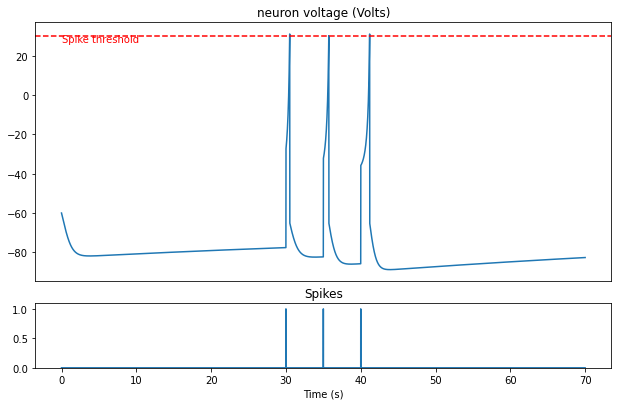

In [69]:
# Use Euler method for solving a izhikevich neuron model
# izhikevich model differential equation:
#   dv/dt = 0.04v^2 + 5v + 140 - u + I
#   du/dt = a(bv - u)
#   if v >= 30mV, then v = c and u = u + d
#   where v is the membrane potential, u is the recovery variable, and I is the input current
#   a, b, c, and d are constants that determine the behavior of the neuron
#   usually, we take a = 0.02, b = 0.2, c = -65, and d = 8 (A regular spiking neuron type)

t = Decimal("0") # Starting time
dt = Decimal("0.005") # Time step
tEnd = Decimal("70") # End time

# LIF parameters
V_th = 30 # Volts
V_init = -60 # neuron starting voltage (at t = 0)
Vt = -60 # Neuron voltage at time step t
Ut = 0 # Neuron recovery variable at time step t
tau = 2. # Time constant
V_excitation = 50 # Voltage added to the neuron at each time step
tExcitation = [Decimal("30"),Decimal("35"),Decimal("40")]

# Model parameters
a = .02
b = .2
c = -65
d = 8

lstV = [] # List to store voltage values
lstTime = [] # List to store time values
lstSpike = [] # List to store spike values at each time step

for i in range(int(tEnd/dt)):
    # Use Euler method
    
    # If voltage is greater than threshold, reset voltage
    if V_th <= Vt:
        
        # Reset voltage and recovery variable
        Vt = c
        Ut = Ut + d
    
    Vt = Vt + float(dt) * (.04*Vt**2 + 5. * Vt +140. - Ut)
    Ut = Ut + float(dt) * a * (b * Vt - Ut)
    
    # If excited, add extra voltage
    if t in tExcitation:
        lstSpike.append(1)
        Vt += V_excitation
    else:
        lstSpike.append(0)
    
    lstV.append(Vt)
    lstTime.append(t)
    t += dt
    
# Create figure and subplots
fig = plt.figure(figsize=(10, 6))

# Top subplot (80% of the height)
ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])  # [left, bottom, width, height]
ax1.plot(lstTime, lstV)
ax1.set_title('neuron voltage (Volts)')
ax1.xaxis.set_visible(False)  # Hide x-axis numbers
ax1.axhline(y=V_th, color='r', linestyle='--')
ax1.text(lstTime[0], V_th * .9, 'Spike threshold', color='r')

# Bottom subplot (20% of the height)
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.15])  # [left, bottom, width, height]
ax2.plot(lstTime, lstSpike)
ax2.set_ylim(0, 1.1)
ax2.set_title('Spikes')
ax2.set_xlabel('Time (s)')


plt.show()